# PLOTS OF TOWERS AND ISO DISTRIBUTIONS

This notebook takes as an input the DataFrame output of `iso2cut.py`

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import ROOT
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

import matplotlib
from matplotlib import pyplot as plt

Welcome to JupyROOT 6.14/04


In [2]:
dRsgn = 0.1
off = 10
list_dRiso = [0.2,0.3,0.4,0.5,0.6]

indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/isolation_application_dRsgn1_test'
name = 'threshold'
WP = 90

In [3]:
def plotter( df,list_dRiso, dRsgn, mode, off):
    fig = plt.figure(figsize = (10, 10))
    ax1 = fig.add_subplot(111)

    for dRiso in list_dRiso:
        ax1.hist(df['tower_{0}Iso_dRsgn{1}_dRiso{2}'.format(mode,int(dRsgn*off),int(dRiso*off))], label=r'tower_{0}Iso_dRsgn{1}_dRiso{2}'.format(mode,dRsgn,dRiso), histtype='step', lw=2)
    
    ax1.legend(loc = 'upper right', fontsize=15)
    ax1.set_xlabel(r'{0} between the signal cone and the isolation cone [GeV]'.format(mode), fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
    ax1.set_title('SingleTau noPU', fontsize=20)

    fig.show()
    
def overlay_plotter( df1, df2,list_dRiso, dRsgn, mode, off):
    for dRiso in list_dRiso:
        fig = plt.figure(figsize = (10, 10))
        ax1 = fig.add_subplot(111)
        
        step = 5
        bins = np.arange(0,250,step)
        
        tau, _, _ = ax1.hist(df1['tower_{0}Iso_dRsgn{1}_dRiso{2}'.format(mode,int(dRsgn*off),int(dRiso*off))], label=r'Tau tower_{0}Iso_dRsgn{1}_dRiso{2}'.format(mode,dRsgn,dRiso), histtype='step', density=1, lw=2, bins=bins)
        qcd, _, _ = ax1.hist(df2['tower_{0}Iso_dRsgn{1}_dRiso{2}'.format(mode,int(dRsgn*off),int(dRiso*off))], label=r'QCD tower_{0}Iso_dRsgn{1}_dRiso{2}'.format(mode,dRsgn,dRiso), histtype='step', density=1, lw=2, bins=bins)         
        cut = 0
        tau_pass = 0
        qcd_pass = 0
        for i in range(len(tau)):
            tau_pass += tau[i]
            qcd_pass += qcd[i]
            if qcd[i] > tau[i] and cut>25:
                break
            cut += step
        ax1.axvline(x=cut, color='black', lw=2)
        ax1.text(cut,0.005,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau)*100,2), round(float(qcd_pass)/np.sum(qcd)*100,2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd))*100,2)), fontsize=15)
        ax1.legend(loc = 'upper right', fontsize=15)
        ax1.set_xlabel(r'{0} between the signal cone and the isolation cone [GeV]'.format(mode), fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
        ax1.set_title('Overlay of SingleTau PU200 and QCD PU200', fontsize=20)
                
        os.system('mkdir -p /home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/plots/isolation/dRsgn{0}'.format(int(dRsgn*10)))
        fig.savefig('/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/plots/isolation/dRsgn{2}/tw_{0}_dRsgn{2}_dRiso{1}.pdf'.format(mode,int(dRiso*10),int(dRsgn*10),int(dRsgn*10)))
        fig.show()
        del fig, ax1, tau, qcd
        
def cluster_plotter( df1, df2,list_dRiso, mode, off):
    for dRiso in list_dRiso:
        fig = plt.figure(figsize = (10, 10))
        ax1 = fig.add_subplot(111)
        
        step = 5
        bins = np.arange(0,250,step)
        
        tau, _, _ = ax1.hist(df1['cl3d_{0}Iso_dR{1}'.format(mode,int(dRiso*off))], label=r'Tau cl3d_{0}Iso_dR{1}'.format(mode,dRiso), histtype='step', density=1, lw=2, bins=bins)
        qcd, _, _ = ax1.hist(df2['cl3d_{0}Iso_dR{1}'.format(mode,int(dRiso*off))], label=r'QCD cl3d_{0}Iso_dR{1}'.format(mode,dRiso), histtype='step', density=1, lw=2, bins=bins)         
        cut = 0
        tau_pass = 0
        qcd_pass = 0
        for i in range(len(tau)):
            tau_pass += tau[i]
            qcd_pass += qcd[i]
            if qcd[i] > tau[i] and cut>25:
                break
            cut += step
        ax1.axvline(x=cut, color='black', lw=2)
        ax1.text(cut,0.005,"events passing cut = {0}GeV \n tau = {1}% \n qcd = {2}% \n qcd contamination = {3}%".format(cut, round(float(tau_pass)/np.sum(tau)*100,2), round(float(qcd_pass)/np.sum(qcd)*100,2), round(float(qcd_pass)/(np.sum(tau)+np.sum(qcd))*100,2)), fontsize=15)
        ax1.legend(loc = 'upper right', fontsize=15)
        ax1.set_xlabel(r'$E_{T}$ inside the isolation cone [GeV]', fontsize=15); ax1.set_ylabel('a.u.', fontsize=15)
        ax1.set_title('Overlay of SingleTau PU200 and QCD PU200', fontsize=20)
        
        os.system('mkdir -p /home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/plots/isolation/dRsgn{0}'.format(int(dRsgn*10)))
        fig.savefig('/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/plots/isolation/dRsgn{2}/cl_{0}_dRiso{1}.pdf'.format(mode,int(dRiso*10),int(dRsgn*10)))
        fig.show()
        del fig, ax1

## Tau

In [4]:
inFileTau_cl3d = {
    'threshold'    : indir+'/AllTau_PU200_th_L1candidates.hdf5',
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

store = pd.HDFStore(inFileTau_cl3d[name], mode='r')
dfTau = store[name]
store.close()

### eT distributions under different $\Delta$R Iso hypotheses

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


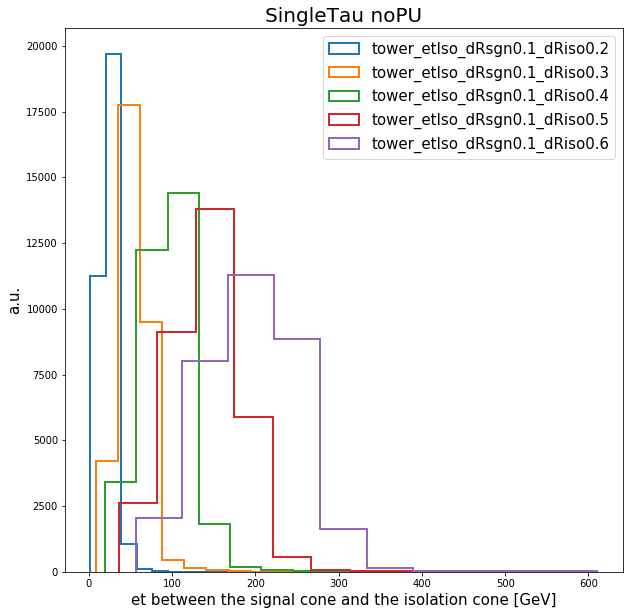

In [5]:
plotter(dfTau,list_dRiso,dRsgn,'et', off)

### e distributions under different $\Delta$R Iso hypotheses

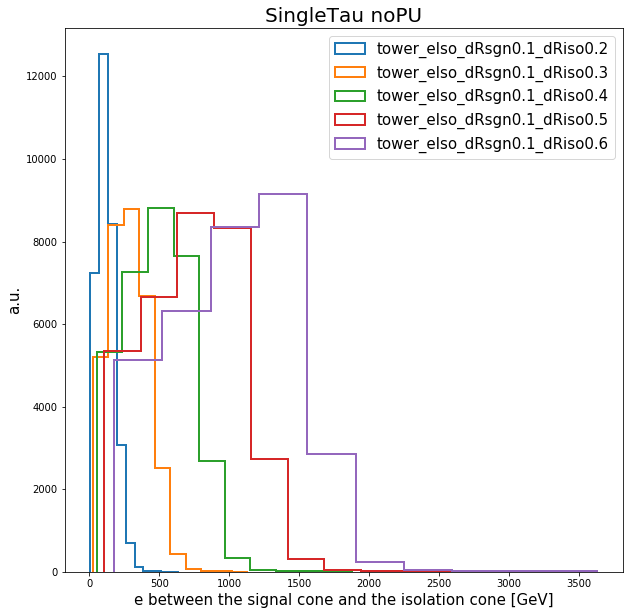

In [6]:
plotter(dfTau,list_dRiso,dRsgn,'e', off)

### eT EM-HAD distributions under different $\Delta$R Iso hypotheses

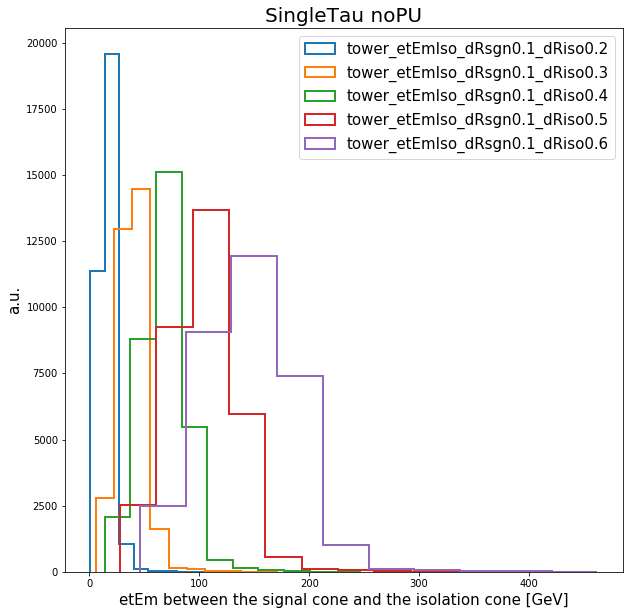

In [7]:
plotter(dfTau,list_dRiso,dRsgn,'etEm', off)

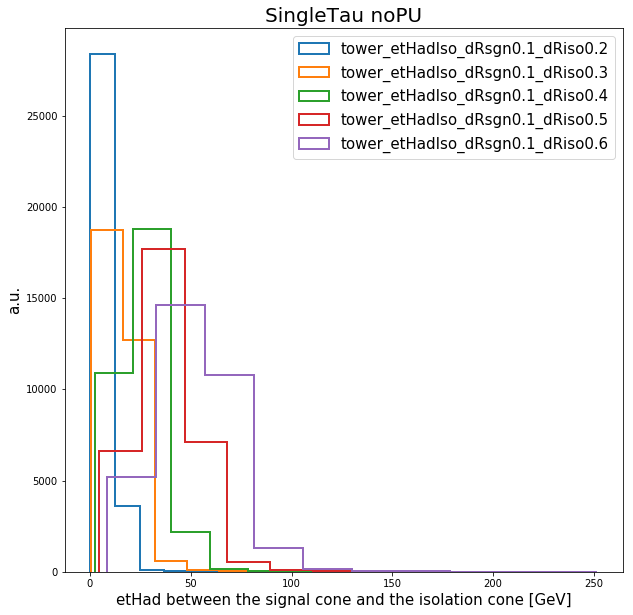

In [8]:
plotter(dfTau,list_dRiso,dRsgn,'etHad', off)

## QCD

In [9]:
inFileQCD_cl3d = {
    'threshold'    : indir+'/QCD_PU200_th_L1candidates.hdf5',
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

store = pd.HDFStore(inFileQCD_cl3d[name], mode='r')
dfQCD = store[name]
store.close()

### eT distributions under different $\Delta$R Iso hypotheses

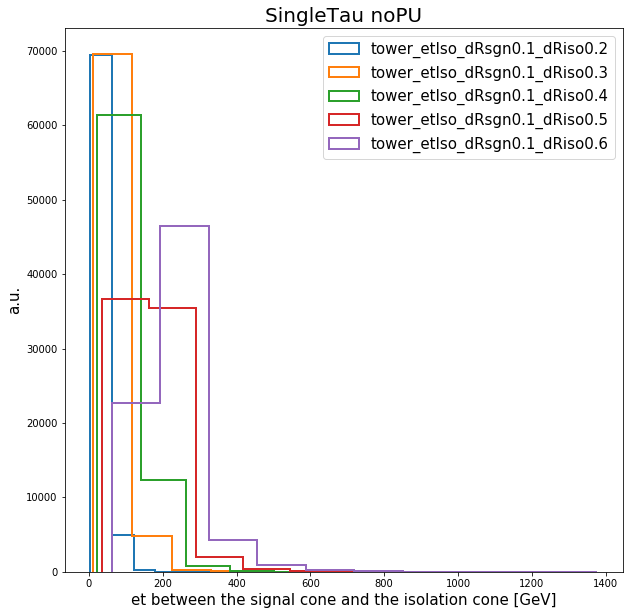

In [10]:
plotter(dfQCD,list_dRiso,dRsgn,'et', off)

### e distributions under different $\Delta$R Iso hypotheses

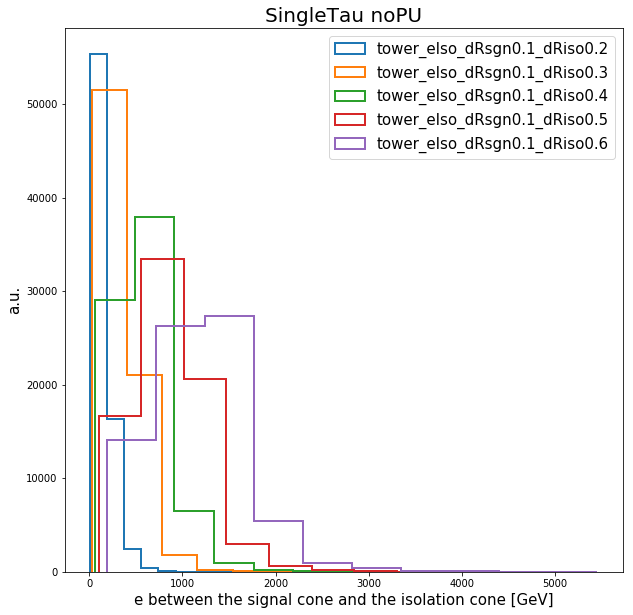

In [11]:
plotter(dfQCD,list_dRiso,dRsgn,'e', off)

### eT EM-HAD distributions under different $\Delta$R Iso hypotheses

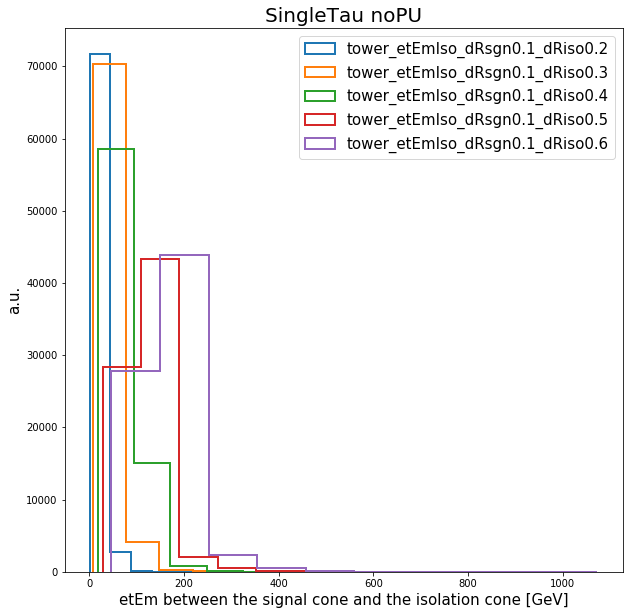

In [12]:
plotter(dfQCD,list_dRiso,dRsgn,'etEm', off)

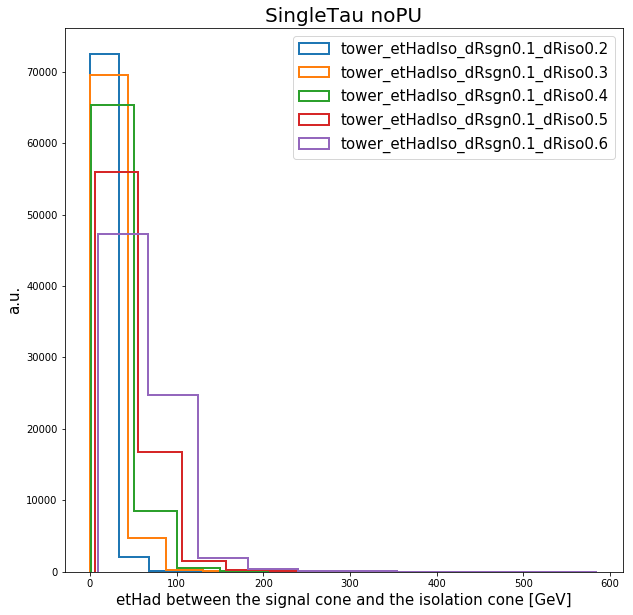

In [13]:
plotter(dfQCD,list_dRiso,dRsgn,'etHad', off)

## Overlayed RelValSingleTau - RelValQCD 

### eT overlayed distributions under different $\Delta$R Sgn hypotheses

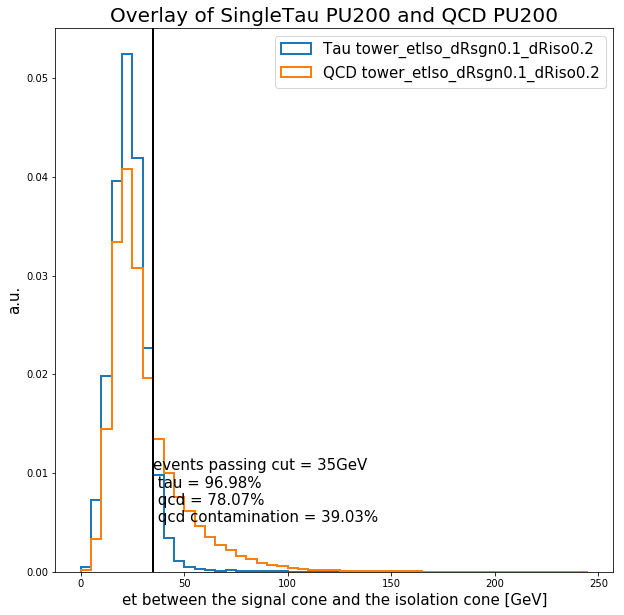

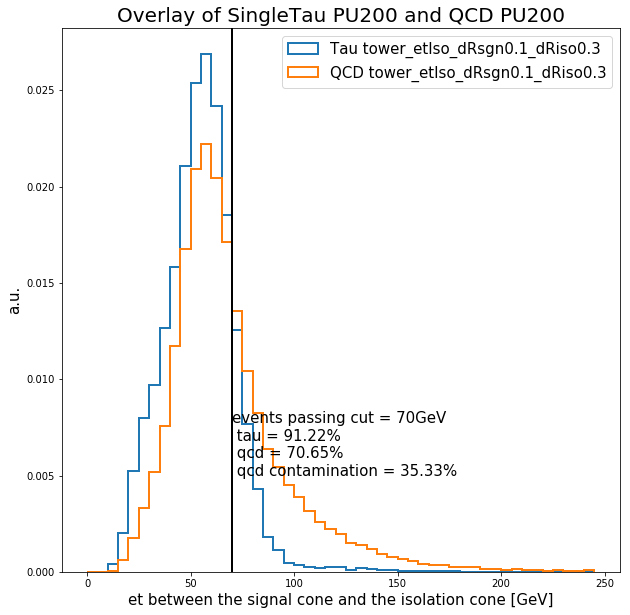

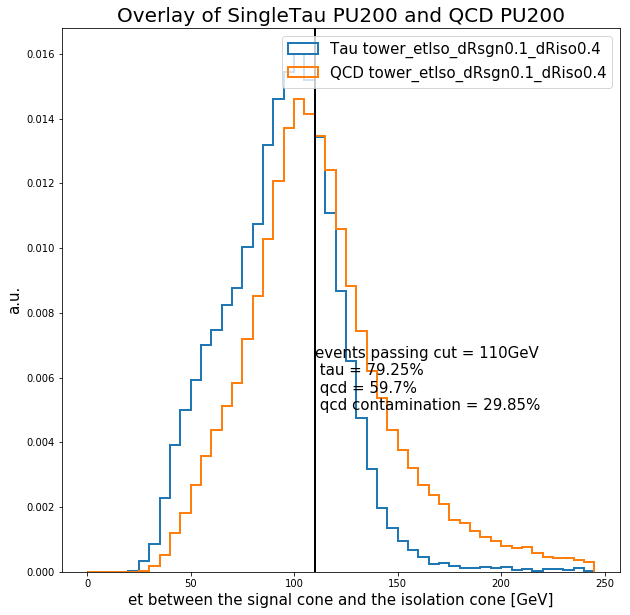

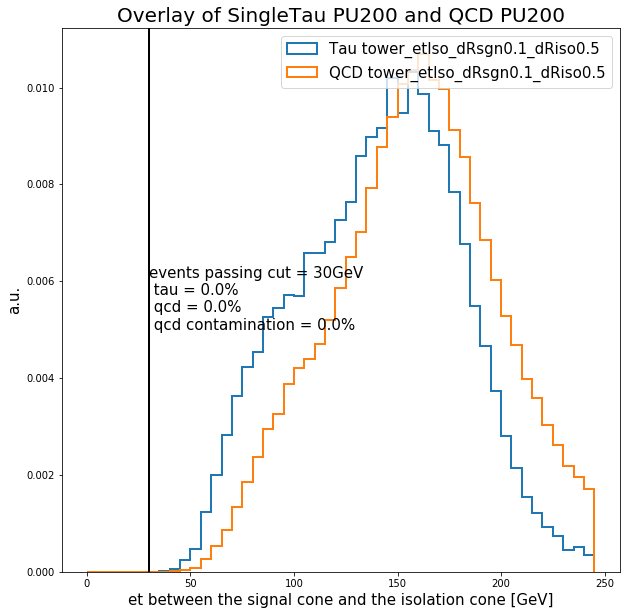

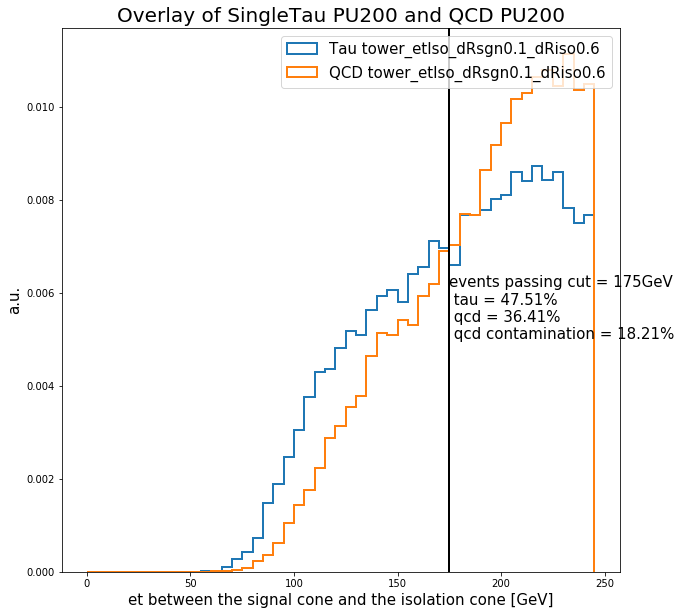

In [14]:
overlay_plotter(dfTau,dfQCD,list_dRiso,dRsgn,'et', off)

### e overlayed distributions under different $\Delta$R Sgn hypotheses

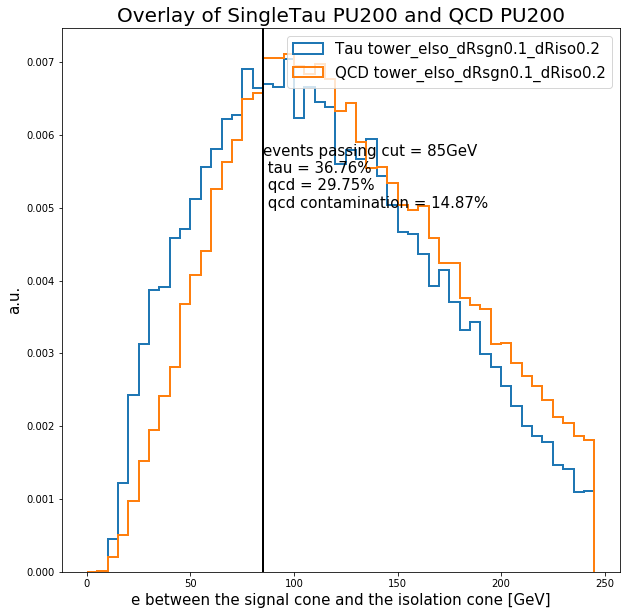

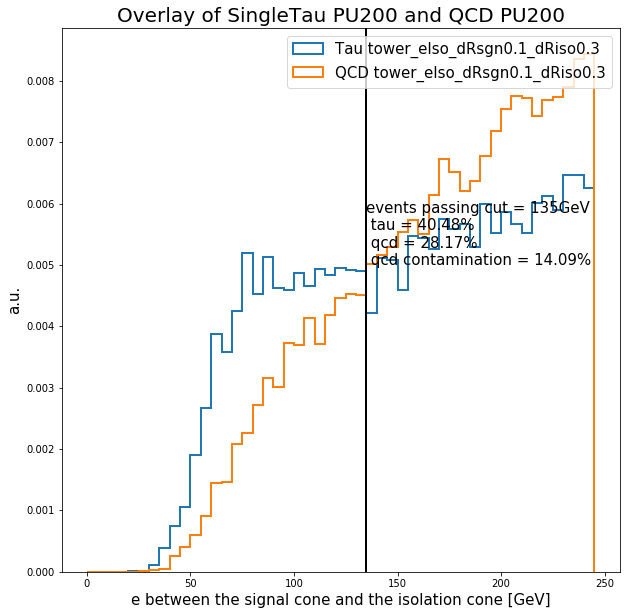

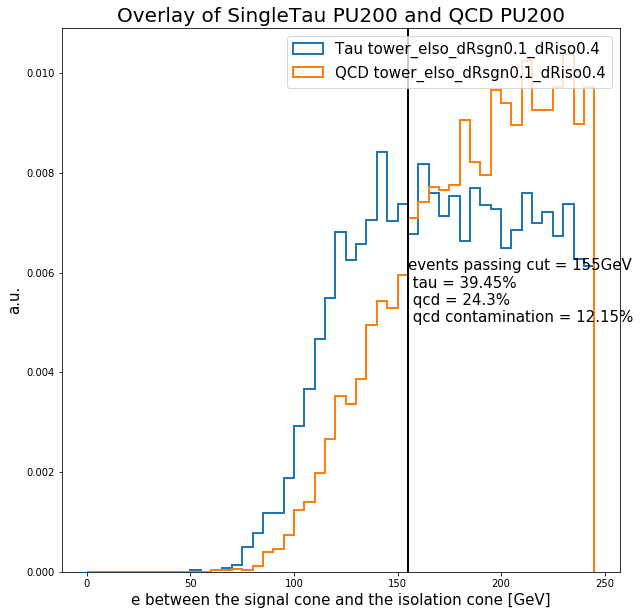

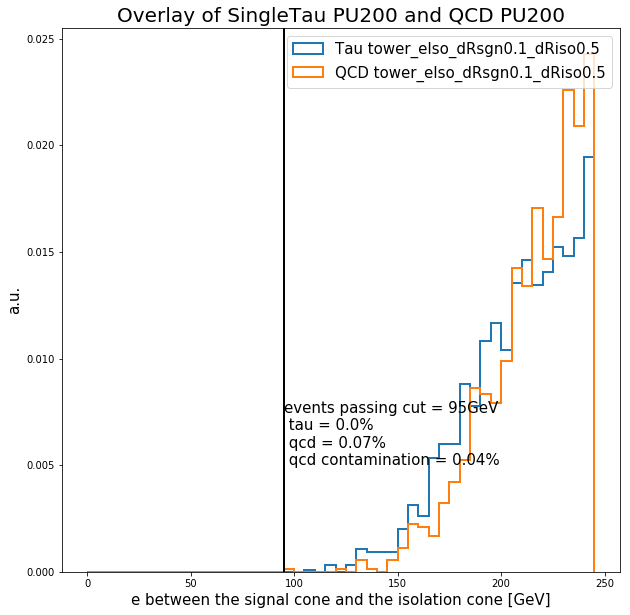

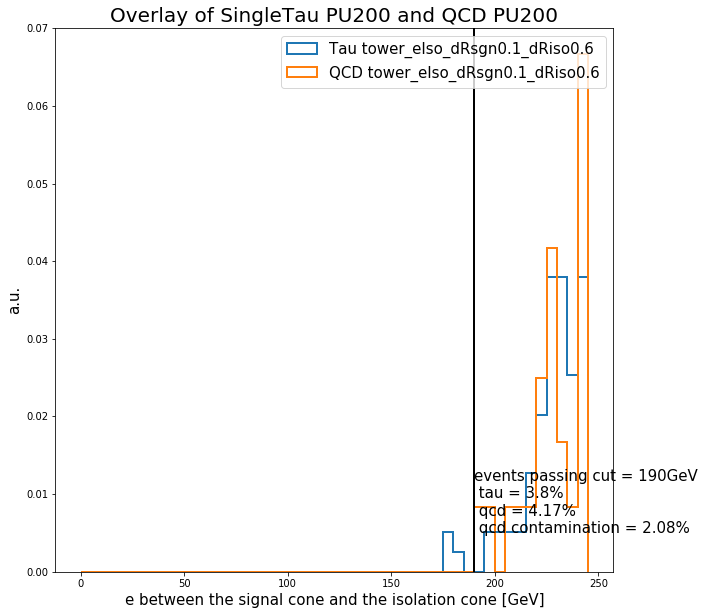

In [15]:
overlay_plotter(dfTau,dfQCD,list_dRiso,dRsgn,'e', off)

### eT EM-HAD overlayed distributions under different $\Delta$R Sgn hypotheses

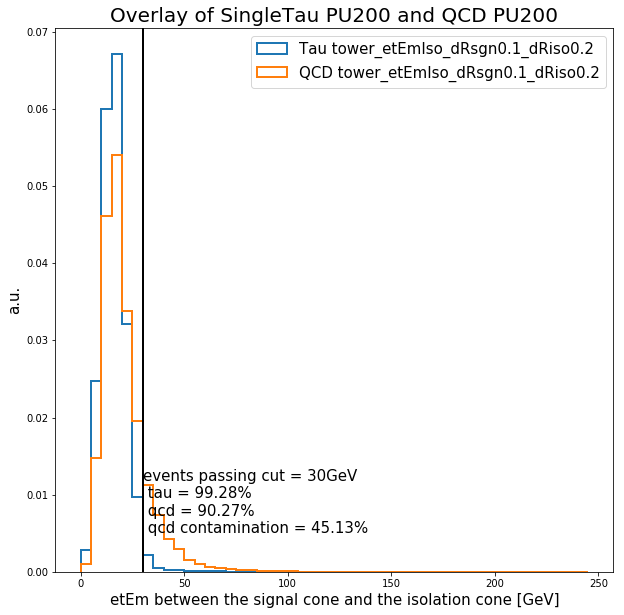

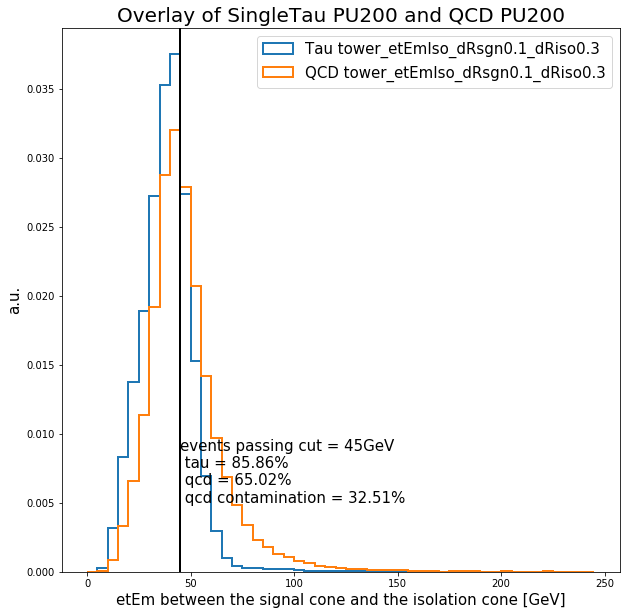

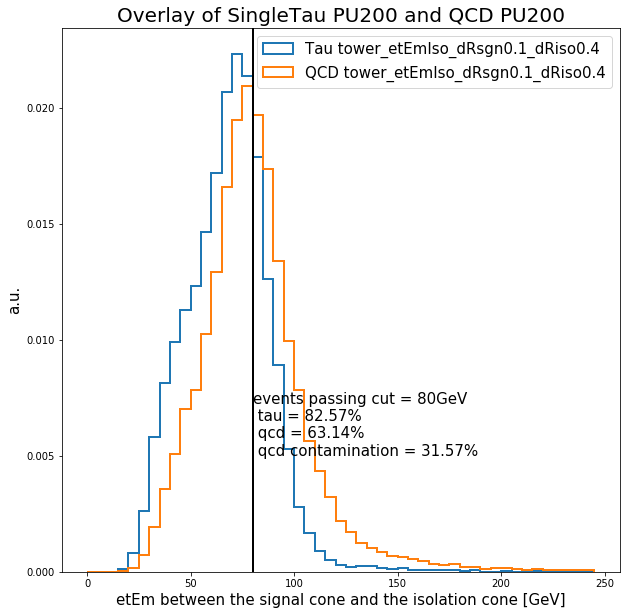

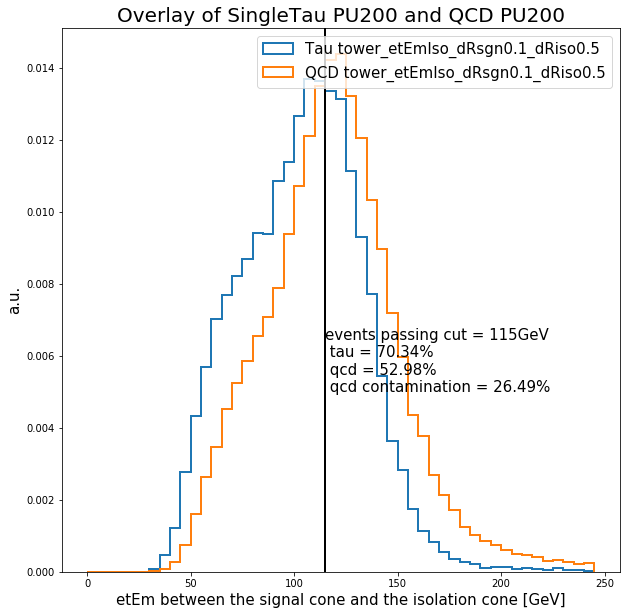

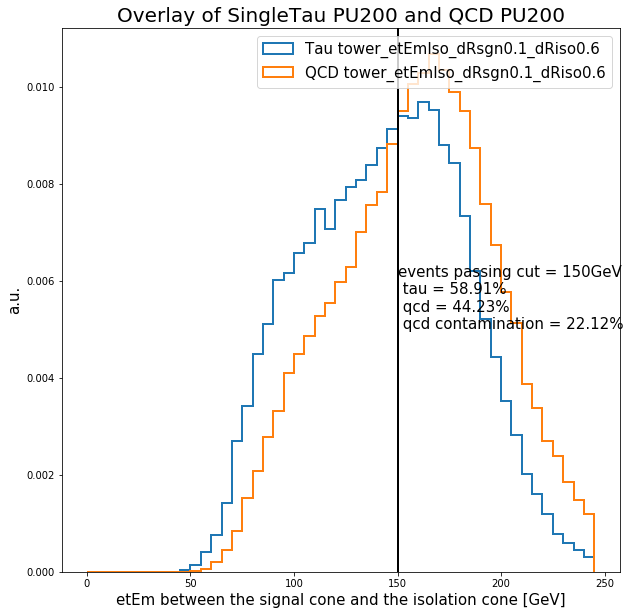

In [16]:
overlay_plotter(dfTau,dfQCD,list_dRiso,dRsgn,'etEm', off)

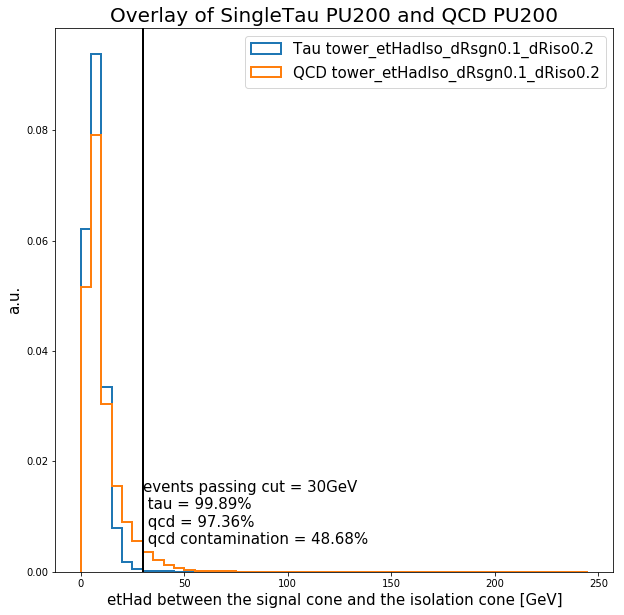

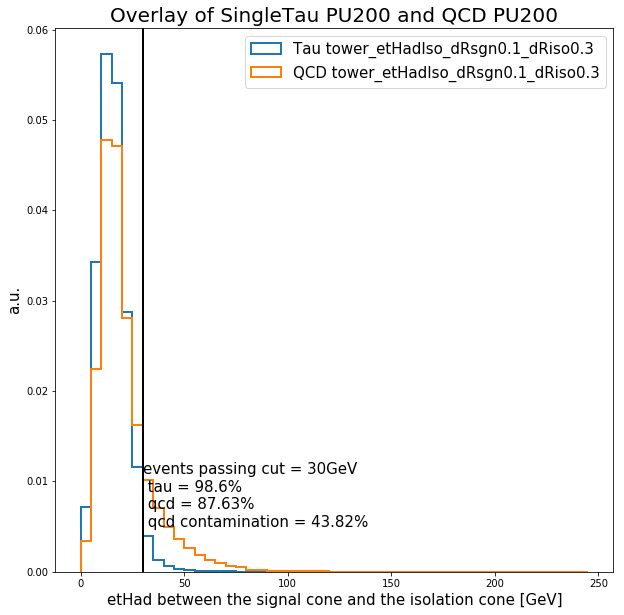

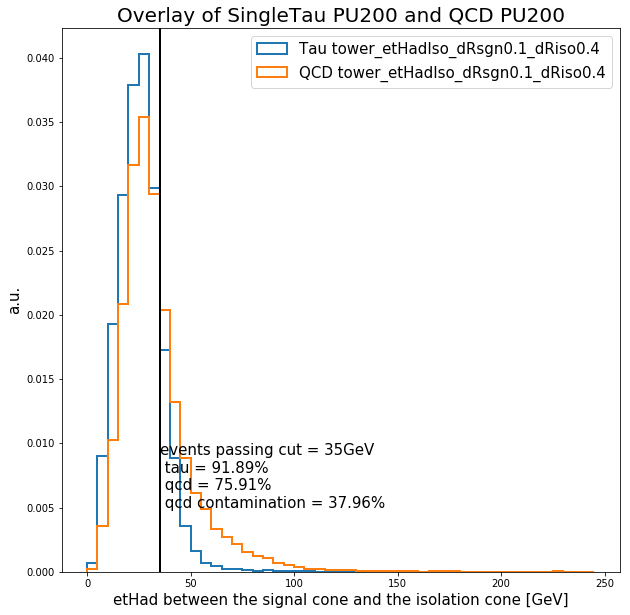

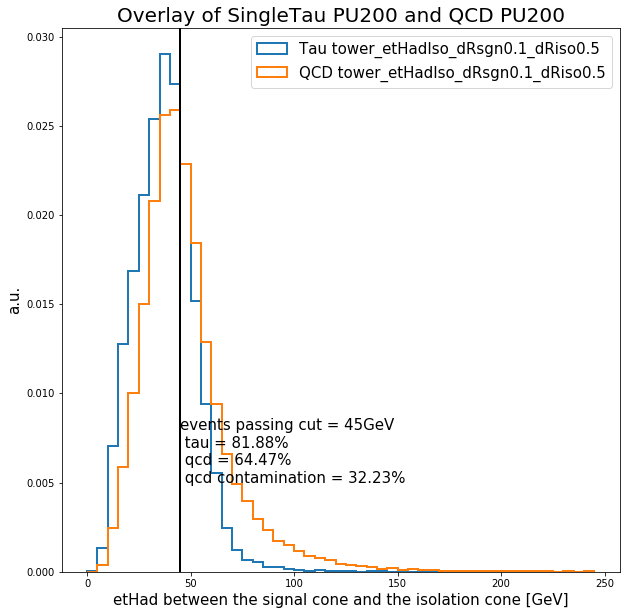

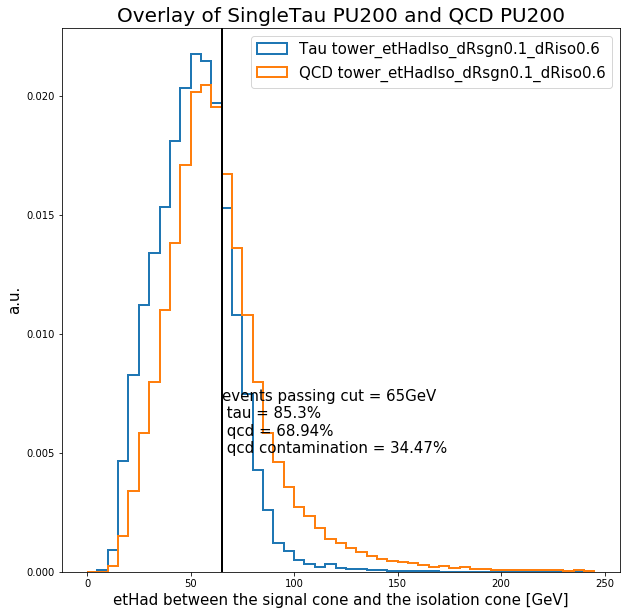

In [17]:
overlay_plotter(dfTau,dfQCD,list_dRiso,dRsgn,'etHad', off)

### eT overlayed distributions under different $\Delta$R Sgn hypotheses - clusterIso

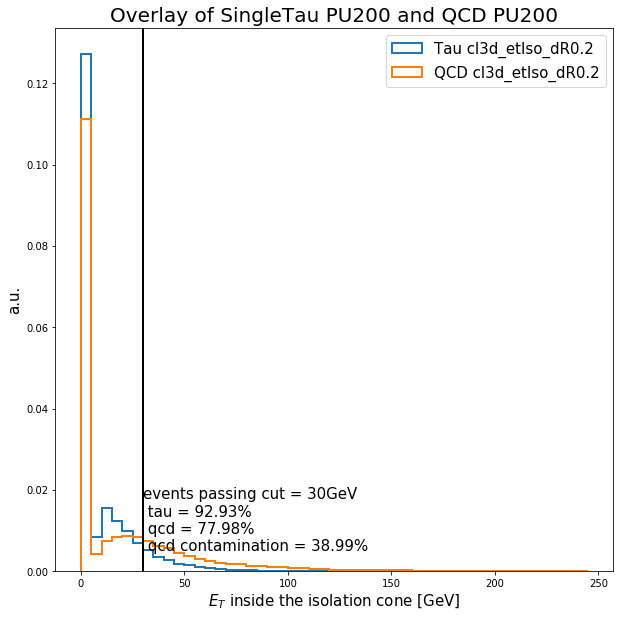

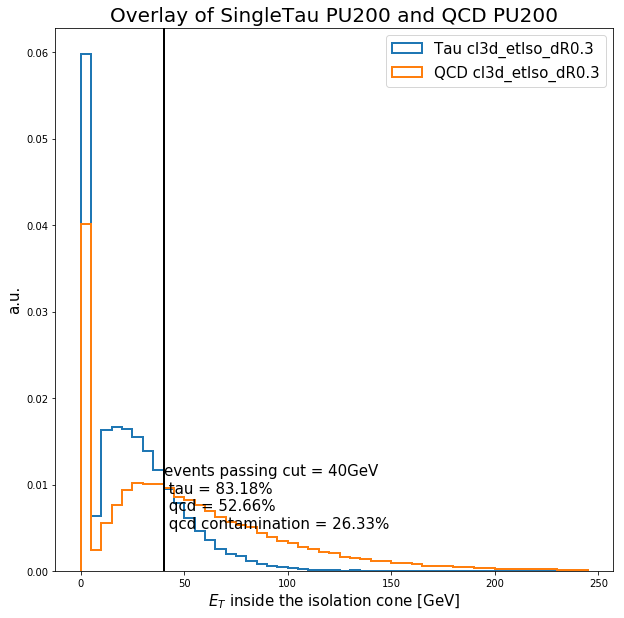

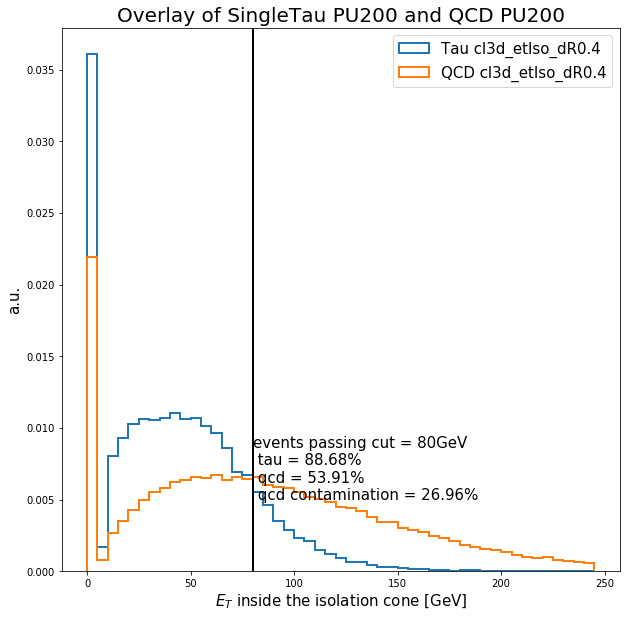

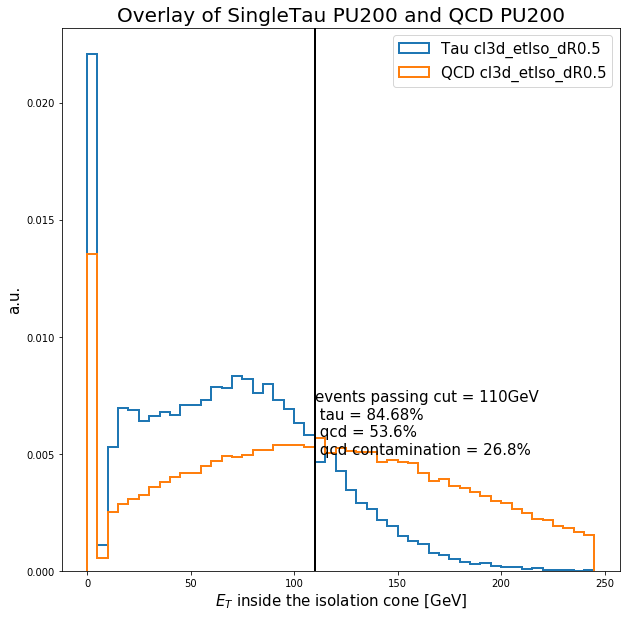

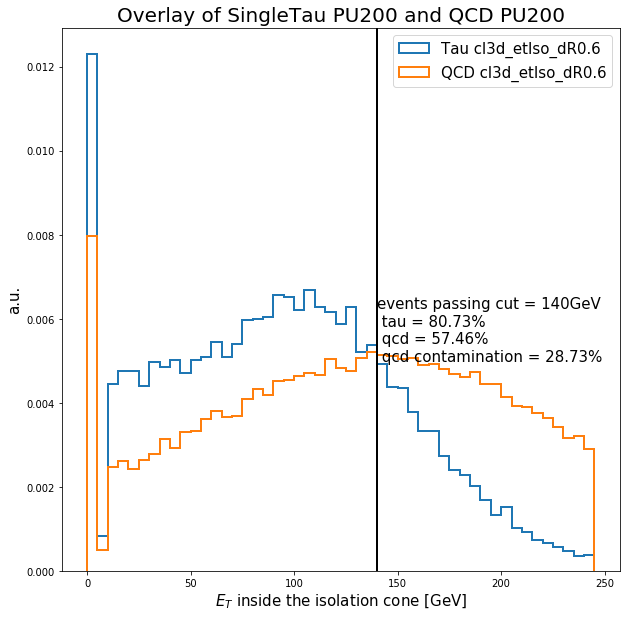

In [18]:
cluster_plotter(dfTau,dfQCD,list_dRiso,'et', off)

## Efficacity of the possible cuts to apply

In [19]:
def cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso):
    print('\t\t\t\t\t Tau \t\t\t QCD')

    percTau = len(dfTau.query('cl3d_pubdt_passWP{0}==True and (tower_etIso_dRsgn{1}_dRiso{2}<={3} or tower_etEmIso_dRsgn{1}_dRiso{7}<={6} or cl3d_etIso_dR{4}<={5})'.format(WP, int(dRsgn*10), int(dRiso*10), twEtiso, int(dRcl3d*10), clEtIso, twEtEmiso, int(dRisoEm*10))))/len(dfTau)*100
    percQCD = len(dfQCD.query('cl3d_pubdt_passWP{0}==True and (tower_etIso_dRsgn{1}_dRiso{2}<={3} or tower_etEmIso_dRsgn{1}_dRiso{7}<={6} or cl3d_etIso_dR{4}<={5})'.format(WP, int(dRsgn*10), int(dRiso*10), twEtiso, int(dRcl3d*10), clEtIso, twEtEmiso, int(dRisoEm*10))))/len(dfQCD)*100
    print('twEtiso or clEtIso or twEtEmiso \t', round(percTau,2), '% (', round(percTau*len(dfTau),0) ,') \t', round(percQCD,2), '%')

    percTau = len(dfTau.query('cl3d_pubdt_passWP{0}==True and (tower_etIso_dRsgn{1}_dRiso{2}<={3} and (tower_etEmIso_dRsgn{1}_dRiso{7}<={6} or cl3d_etIso_dR{4}<={5}))'.format(WP, int(dRsgn*10), int(dRiso*10), twEtiso, int(dRcl3d*10), clEtIso, twEtEmiso, int(dRisoEm*10))))/len(dfTau)*100
    percQCD = len(dfQCD.query('cl3d_pubdt_passWP{0}==True and (tower_etIso_dRsgn{1}_dRiso{2}<={3} and (tower_etEmIso_dRsgn{1}_dRiso{7}<={6} or cl3d_etIso_dR{4}<={5}))'.format(WP, int(dRsgn*10), int(dRiso*10), twEtiso, int(dRcl3d*10), clEtIso, twEtEmiso, int(dRisoEm*10))))/len(dfQCD)*100
    print('twEtiso and (clEtIso or twEtEmiso) \t', round(percTau,2), '% (', round(percTau*len(dfTau),0) ,') \t', round(percQCD,2), '%')

    percTau = len(dfTau.query('cl3d_pubdt_passWP{0}==True and ((tower_etIso_dRsgn{1}_dRiso{2}<={3} or cl3d_etIso_dR{4}<={5}) and tower_etEmIso_dRsgn{1}_dRiso{7}<={6})'.format(WP, int(dRsgn*10), int(dRiso*10), twEtiso, int(dRcl3d*10), clEtIso, twEtEmiso, int(dRisoEm*10))))/len(dfTau)*100
    percQCD = len(dfQCD.query('cl3d_pubdt_passWP{0}==True and ((tower_etIso_dRsgn{1}_dRiso{2}<={3} or cl3d_etIso_dR{4}<={5}) and tower_etEmIso_dRsgn{1}_dRiso{7}<={6})'.format(WP, int(dRsgn*10), int(dRiso*10), twEtiso, int(dRcl3d*10), clEtIso, twEtEmiso, int(dRisoEm*10))))/len(dfQCD)*100
    print('(twEtiso or clEtIso) and twEtEmiso \t', round(percTau,2), '% (', round(percTau*len(dfTau),0) ,') \t', round(percQCD,2), '%')
    
    percTau = len(dfTau.query('cl3d_pubdt_passWP{0}==True and ((tower_etIso_dRsgn{1}_dRiso{2}<={3} or tower_etEmIso_dRsgn{1}_dRiso{7}<={6}) and cl3d_etIso_dR{4}<={5})'.format(WP, int(dRsgn*10), int(dRiso*10), twEtiso, int(dRcl3d*10), clEtIso, twEtEmiso, int(dRisoEm*10))))/len(dfTau)*100
    percQCD = len(dfQCD.query('cl3d_pubdt_passWP{0}==True and ((tower_etIso_dRsgn{1}_dRiso{2}<={3} or tower_etEmIso_dRsgn{1}_dRiso{7}<={6}) and cl3d_etIso_dR{4}<={5})'.format(WP, int(dRsgn*10), int(dRiso*10), twEtiso, int(dRcl3d*10), clEtIso, twEtEmiso, int(dRisoEm*10))))/len(dfQCD)*100
    print('(twEtiso or twEtEmiso) and clEtIso \t', round(percTau,2), '% (', round(percTau*len(dfTau),0) ,') \t', round(percQCD,2), '%')
    
    percTau = len(dfTau.query('cl3d_pubdt_passWP{0}==True and (tower_etIso_dRsgn{1}_dRiso{2}<={3} and tower_etEmIso_dRsgn{1}_dRiso{7}<={6} and cl3d_etIso_dR{4}<={5})'.format(WP, int(dRsgn*10), int(dRiso*10), twEtiso, int(dRcl3d*10), clEtIso, twEtEmiso, int(dRisoEm*10))))/len(dfTau)*100
    percQCD = len(dfQCD.query('cl3d_pubdt_passWP{0}==True and (tower_etIso_dRsgn{1}_dRiso{2}<={3} and tower_etEmIso_dRsgn{1}_dRiso{7}<={6} and cl3d_etIso_dR{4}<={5})'.format(WP, int(dRsgn*10), int(dRiso*10), twEtiso, int(dRcl3d*10), clEtIso, twEtEmiso, int(dRisoEm*10))))/len(dfQCD)*100
    print('twEtiso and clEtIso and twEtEmiso \t', round(percTau,2), '% (', round(percTau*len(dfTau),0) ,') \t', round(percQCD,2), '%')

In [20]:
dRsgn = 0.1

indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/isolation_application_dRsgn1'
name = 'threshold'
WP = 90

inFileTau_cl3d = {
    'threshold'    : indir+'/AllTau_PU200_th_L1candidates.hdf5',
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

store = pd.HDFStore(inFileTau_cl3d[name], mode='r')
dfTau = store[name]
store.close()

inFileQCD_cl3d = {
    'threshold'    : indir+'/QCD_PU200_th_L1candidates.hdf5',
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

store = pd.HDFStore(inFileQCD_cl3d[name], mode='r')
dfQCD = store[name]
store.close()


dRiso = 0.3 ; dRisoEm = 0.3 ; dRcl3d = 0.4
twEtiso = 70 ; twEtEmiso = 50 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.3 ; dRisoEm = 0.4 ; dRcl3d = 0.4
twEtiso = 70 ; twEtEmiso = 80 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.3 ; dRisoEm = 0.5 ; dRcl3d = 0.4
twEtiso = 70 ; twEtEmiso = 150 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.4 ; dRisoEm = 0.3 ; dRcl3d = 0.4
twEtiso = 115 ; twEtEmiso = 50 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.4 ; dRisoEm = 0.4 ; dRcl3d = 0.4
twEtiso = 115 ; twEtEmiso = 80 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.4 ; dRisoEm = 0.5 ; dRcl3d = 0.4
twEtiso = 115 ; twEtEmiso = 150 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.5 ; dRisoEm = 0.3 ; dRcl3d = 0.4
twEtiso = 150 ; twEtEmiso = 50 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.5 ; dRisoEm = 0.4 ; dRcl3d = 0.4
twEtiso = 150 ; twEtEmiso = 80 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.5 ; dRisoEm = 0.5 ; dRcl3d = 0.4
twEtiso = 150 ; twEtEmiso = 150 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)


					 Tau 			 QCD
twEtiso or clEtIso or twEtEmiso 	 62.45 % ( 2007200.0 ) 	 24.33 %
twEtiso and (clEtIso or twEtEmiso) 	 46.33 % ( 1489300.0 ) 	 14.4 %
(twEtiso or clEtIso) and twEtEmiso 	 47.05 % ( 1512200.0 ) 	 15.23 %
(twEtiso or twEtEmiso) and clEtIso 	 33.93 % ( 1090700.0 ) 	 7.43 %
twEtiso and clEtIso and twEtEmiso 	 29.84 % ( 959000.0 ) 	 5.65 %


					 Tau 			 QCD
twEtiso or clEtIso or twEtEmiso 	 62.13 % ( 1997200.0 ) 	 24.19 %
twEtiso and (clEtIso or twEtEmiso) 	 45.28 % ( 1455500.0 ) 	 13.67 %
(twEtiso or clEtIso) and twEtEmiso 	 40.24 % ( 1293400.0 ) 	 14.02 %
(twEtiso or twEtEmiso) and clEtIso 	 32.93 % ( 1058500.0 ) 	 7.46 %
twEtiso and clEtIso and twEtEmiso 	 25.08 % ( 806200.0 ) 	 5.13 %


					 Tau 			 QCD
twEtiso or clEtIso or twEtEmiso 	 63.76 % ( 2049400.0 ) 	 33.08 %
twEtiso and (clEtIso or twEtEmiso) 	 46.44 % ( 1492600.0 ) 	 14.86 %
(twEtiso or clEtIso) and twEtEmiso 	 51.48 % ( 1654600.0 ) 	 20.32 %
(twEtiso or twEtEmiso) and clEtIso 	 37.03 % ( 1190300.0 ) 	 11

In [21]:
dRsgn = 0.2

indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/isolation_application_dRsgn2'
name = 'threshold'
WP = 90

inFileTau_cl3d = {
    'threshold'    : indir+'/AllTau_PU200_th_L1candidates.hdf5',
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

store = pd.HDFStore(inFileTau_cl3d[name], mode='r')
dfTau = store[name]
store.close()

inFileQCD_cl3d = {
    'threshold'    : indir+'/QCD_PU200_th_L1candidates.hdf5',
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

store = pd.HDFStore(inFileQCD_cl3d[name], mode='r')
dfQCD = store[name]
store.close()


dRiso = 0.4 ; dRisoEm = 0.4 ; dRcl3d = 0.4
twEtiso = 80 ; twEtEmiso = 60 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.4 ; dRisoEm = 0.5 ; dRcl3d = 0.4
twEtiso = 80 ; twEtEmiso = 95 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.5 ; dRisoEm = 0.4 ; dRcl3d = 0.4
twEtiso = 125 ; twEtEmiso = 60 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.5 ; dRisoEm = 0.5 ; dRcl3d = 0.4
twEtiso = 125 ; twEtEmiso = 95 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

					 Tau 			 QCD
twEtiso or clEtIso or twEtEmiso 	 64.84 % ( 2084000.0 ) 	 25.86 %
twEtiso and (clEtIso or twEtEmiso) 	 46.42 % ( 1492000.0 ) 	 17.41 %
(twEtiso or clEtIso) and twEtEmiso 	 48.16 % ( 1548000.0 ) 	 18.3 %
(twEtiso or twEtEmiso) and clEtIso 	 32.35 % ( 1039900.0 ) 	 8.25 %
twEtiso and clEtIso and twEtEmiso 	 27.34 % ( 878900.0 ) 	 6.74 %


					 Tau 			 QCD
twEtiso or clEtIso or twEtEmiso 	 64.7 % ( 2079800.0 ) 	 25.71 %
twEtiso and (clEtIso or twEtEmiso) 	 45.78 % ( 1471600.0 ) 	 16.95 %
(twEtiso or clEtIso) and twEtEmiso 	 41.44 % ( 1332100.0 ) 	 16.94 %
(twEtiso or twEtEmiso) and clEtIso 	 30.7 % ( 986900.0 ) 	 7.93 %
twEtiso and clEtIso and twEtEmiso 	 22.91 % ( 736400.0 ) 	 6.16 %


					 Tau 			 QCD
twEtiso or clEtIso or twEtEmiso 	 64.78 % ( 2082100.0 ) 	 26.01 %
twEtiso and (clEtIso or twEtEmiso) 	 39.37 % ( 1265500.0 ) 	 16.1 %
(twEtiso or clEtIso) and twEtEmiso 	 47.39 % ( 1523300.0 ) 	 17.74 %
(twEtiso or twEtEmiso) and clEtIso 	 31.57 % ( 1014700.0 ) 	 8.21 %

In [22]:
dRsgn = 0.3

indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/isolation_application_dRsgn3'
name = 'threshold'

inFileTau_cl3d = {
    'threshold'    : indir+'/AllTau_PU200_th_L1candidates.hdf5',
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

store = pd.HDFStore(inFileTau_cl3d[name], mode='r')
dfTau = store[name]
store.close()

inFileQCD_cl3d = {
    'threshold'    : indir+'/QCD_PU200_th_L1candidates.hdf5',
    'supertrigger' : indir+'/',
    'bestchoice'   : indir+'/',
    'bestcoarse'   : indir+'/',
    'mixed'        : indir+'/'
}

store = pd.HDFStore(inFileQCD_cl3d[name], mode='r')
dfQCD = store[name]
store.close()


dRiso = 0.4 ; dRisoEm = 0.4 ; dRcl3d = 0.4
twEtiso = 45 ; twEtEmiso = 30 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.4 ; dRisoEm = 0.5 ; dRcl3d = 0.4
twEtiso = 45 ; twEtEmiso = 70 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.4 ; dRisoEm = 0.6 ; dRcl3d = 0.4
twEtiso = 45 ; twEtEmiso = 110 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.5 ; dRisoEm = 0.4 ; dRcl3d = 0.4
twEtiso = 95 ; twEtEmiso = 30 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.5 ; dRisoEm = 0.5 ; dRcl3d = 0.4
twEtiso = 95 ; twEtEmiso = 70 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.5 ; dRisoEm = 0.6 ; dRcl3d = 0.4
twEtiso = 95 ; twEtEmiso = 110 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.6 ; dRisoEm = 0.4 ; dRcl3d = 0.4
twEtiso = 145 ; twEtEmiso = 30 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.6 ; dRisoEm = 0.5 ; dRcl3d = 0.4
twEtiso = 145 ; twEtEmiso = 70 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

print('\n')

dRiso = 0.6 ; dRisoEm = 0.6 ; dRcl3d = 0.4
twEtiso = 145 ; twEtEmiso = 110 ; clEtIso = 80 #GeV
cut_efficacy(dRsgn, dRiso, dRisoEm, dRcl3d, twEtiso, twEtEmiso, clEtIso)

					 Tau 			 QCD
twEtiso or clEtIso or twEtEmiso 	 64.61 % ( 2076600.0 ) 	 26.66 %
twEtiso and (clEtIso or twEtEmiso) 	 45.05 % ( 1448200.0 ) 	 18.98 %
(twEtiso or clEtIso) and twEtEmiso 	 37.48 % ( 1204700.0 ) 	 17.28 %
(twEtiso or twEtEmiso) and clEtIso 	 29.4 % ( 944900.0 ) 	 8.39 %
twEtiso and clEtIso and twEtEmiso 	 20.94 % ( 673200.0 ) 	 6.3 %


					 Tau 			 QCD
twEtiso or clEtIso or twEtEmiso 	 65.07 % ( 2091400.0 ) 	 27.92 %
twEtiso and (clEtIso or twEtEmiso) 	 45.8 % ( 1472300.0 ) 	 19.76 %
(twEtiso or clEtIso) and twEtEmiso 	 41.26 % ( 1326200.0 ) 	 19.08 %
(twEtiso or twEtEmiso) and clEtIso 	 31.05 % ( 998200.0 ) 	 8.86 %
twEtiso and clEtIso and twEtEmiso 	 22.32 % ( 717300.0 ) 	 6.84 %


					 Tau 			 QCD
twEtiso or clEtIso or twEtEmiso 	 65.03 % ( 2090200.0 ) 	 27.98 %
twEtiso and (clEtIso or twEtEmiso) 	 45.29 % ( 1455800.0 ) 	 19.31 %
(twEtiso or clEtIso) and twEtEmiso 	 38.14 % ( 1225800.0 ) 	 18.15 %
(twEtiso or twEtEmiso) and clEtIso 	 30.73 % ( 987700.0 ) 	 8.79 %
